# <center>CMPBIO210, IB120, IB201
# <center>"Introduction to Quantitative Methods in Biology"
# <center>Lecture 3. Analytical and Graphical Solutions of Differential Equations
## <center>Denis Titov

**The goal of this jupyter notebook is to introduce you to analytical methods of solving differential equations using SymPy dsolve() and introduce SymPy library in general**

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Representation of numbers by a computer

The number of numbers between 0 and 1 is $\infty$ while computers have finite memory so can only represent finite numbers.  
This can lead to errors in numerical calculations that you should be familiar with.  
This is not specific to python but rather a general "feature" of computers.  
You can read more about representation of floating point number by a computer here: https://docs.python.org/3/tutorial/floatingpoint.html  
For example, the value below should be True but...

In [2]:
0.1 + 0.1 + 0.1 == .3

False

The example below should be equal to zero but...

In [3]:
(0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1+0.1-1)*1e20

-11102.230246251565

If we look more closely, 0.1 is not exactly 0.1 

In [4]:
0.1

0.1

In [5]:
format(0.1, '.20')

'0.10000000000000000555'

This is because computers represent float64 numbers as binary fractions with relative precision of $2^{-52} \approx 2.22 \cdot 10^{-16}$.  
This is called IEEE 754 standard for representing floating-point numbers.  
Computers represent numbers as a ratio of a number from $0$ to $2^{52}$ and $2^n$ where $n$ can be $-1022$ to $1023$.  
So for 0.1 it will be $\frac{3602879701896397}{2^{55}}=\frac{3602879701896397}{36028797018963968}$

In [6]:
format(3602879701896397 / 36028797018963968,'.20')

'0.10000000000000000555'

Max precision of float numbers in computers is called machine epsilon

In [7]:
np.finfo(float).eps

2.220446049250313e-16

SymPy and other libraries allow you to do exact calculations using ratios of numbers

In [8]:
sym.Rational(1,10)+sym.Rational(1,10)+sym.Rational(1,10)==sym.Rational(3,10)

True

## Introduction to SymPy

SymPy is a python library for symbolic math calculations.  
We will be mostly concerned with using SymPy to analytically solve differential equations but SymPy has many other capabilities that we'll briefly review in the beginning.



The core idea behind SymPy is that it allows you to do symbolic calculation using symbols instead of numbers

In [9]:
x, y = sym.symbols("x y")

In [10]:
5*x-4*x

x

Why should we care about doing symbolic math on a computer when numerical calculations are so easy?  
There're at least two agruments in support of symbolic math calculations:  
- Equations can be dramatically simplified using symbolic math so that it's easier to do numerical calculations 
- Numerical calculations have errors introduced by approximation of numerical methods and by inability of computers to represent rational numbers precisely  


## Analytically solving ODEs with SymPy dsolve()

**Lets use Drug clearance by the kidneys as another example:**

## $\frac{d[Drug](t)}{dt}=-k[Drug](t)$  
  
where $t$ is time,  k is some constant describing kindey filtration rate,  $[Drug](t)$ is blood concentration of drug at time $t$ and $[Drug]_0$ is is blood concentration of drug at $t=0$. 

In [11]:
Drug = sym.symbols("[Drug]", cls=sym.Function)
t, k, Drug_0 = sym.symbols("t, k, [Drug]_0")
Drug_clearance_solution = sym.dsolve(sym.diff(Drug(t), t) + k * Drug(t), Drug(t), ics={Drug(0): Drug_0})
Drug_clearance_solution

Eq([Drug](t), [Drug]_0*exp(-k*t))

We can plot the solution using SymPy built-in plotting function.  
SymPy built-in plot function doesn't require us to make an array of $t$ like matplotlib so might be more convenient.

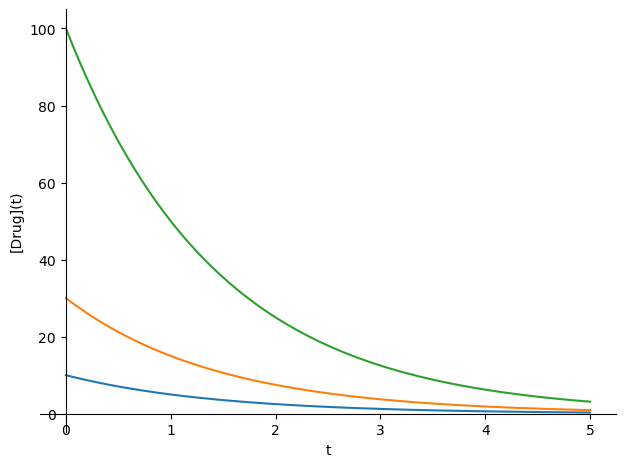

In [12]:
sym.plot(
    Drug_clearance_solution.rhs.subs({Drug_0: 10, k: sym.ln(2)}),
    Drug_clearance_solution.rhs.subs({Drug_0: 30, k: sym.ln(2)}),
    Drug_clearance_solution.rhs.subs({Drug_0: 100, k: sym.ln(2)}),
    (t, 0, 5),
    xlabel="t",
    ylabel="[Drug](t)"
);

You can use this approach to calculate $[S](t)$ for any substrate as long as you know the rate equation and kinetic parameters that describe that enzyme.

## Graphical Methods of Exploring ODEs and Fixed Points

Let's take an ODE $\frac{dy(t)}{dt}=f(t,y(t))$

It is possible to plot the outlines of ODE solution using only $f(t,y(t))$ without solving the differential equation. Values of y(t) where $\frac{dy(t)}{dt}=0$ are called *fixed points*, *steady state points*, or *stable points*. These points are important because they are the points where the system is stable and doesn't change.  
    
Previously we reviewed numerical methods of solving ODE that can give us the solution of this ODE starting from some initial conditions $y(t_0)$. However, there's only one solution of this ODE that goes through $y(t_0)$ and there's an infinite number of other solutions. In addition, sometimes there's no solution that goes through $y(t_0)$.  
  
Therefore, it is often useful to be able to "see" how all the solutions look like using graphical methods reviewed here even though we can't use graphical methods to make precise quantitative predictions like with numerical or analytical solutions.  

Some of the properties of solutions that we can see using graphical methods include steady state, oscillation, stable and unstable points, etc.




### Bacterial growth rate in rich media
  
$\frac{dN(t)}{dt}=kN(t)$  

where $t$ is time,  
k is some constant specific for this E.coli strain and growth conditions,  
$N(t)$ is number of E. coli at time $t$.  
Let's plot a numerical solution to this ODE with $N(0)=1$, $k=1$ and lets make this plot more beautiful than previously:

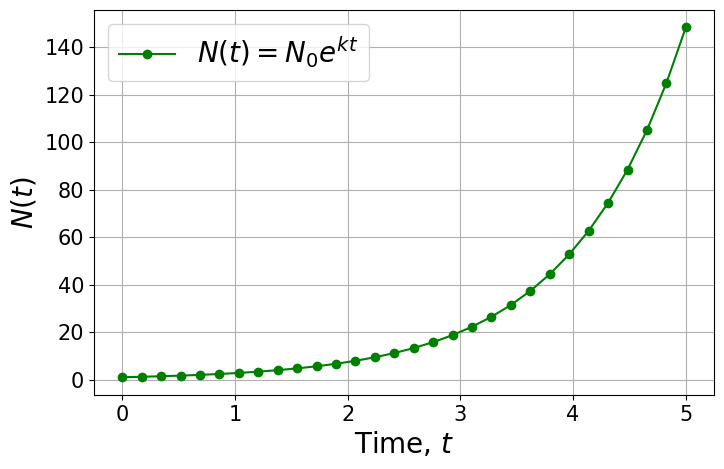

In [13]:
k = 1
N_0 = [1]
tspan = [0, 5]

def fun(t, y):
    dN_dt = k * y
    return dN_dt

soln = solve_ivp(fun, tspan, N_0, t_eval=np.linspace(0, 5, 30))

# The code below plots the solution of ODE
plt.figure(figsize=(8,5), dpi=100)
plt.plot(soln.t, soln.y[0], label=r'$N(t)=N_0e^{kt}$', color="green", marker="o",linestyle="-")
plt.xlabel("Time, $t$", fontsize=20)
plt.ylabel("$N(t)$", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=20)

We want to know how the solution will look like everywhere not just at $N(0)=1$.  
  
  Remember that the analytical solution to $\frac{dN(t)}{dt}=kN(t)$ is $N(t)=Ce^{kt}$ so there's an $\infty$ of solutions that vary by $C$.  
  
  Lets review another example $\frac{dy(t)}{dt}=2t$ and its solution $y(t)=t^2+C$ to further highlight the presence of an $\infty$ of solutions that vary by $C$:

$\frac{dy(t)}{dt}=\lim_{\Delta t \to 0} \frac{y(t+\Delta t)-y(t)}{\Delta t}$  
  
  $\frac{y(t+\Delta t)-y(t)}{\Delta t}=\frac{(t+\Delta t)^2+C-(t)^2-C}{\Delta t}=\frac{t^2+2t \cdot \Delta t + \Delta t^2-t^2}{\Delta t}=2t + \Delta t$  
  
  Since $\Delta t \to 0$, we get $\frac{dy(t)}{dt}=2t$


We can of course numerically solve this ODE under 1000s of initial conditions but this can take time and we still might miss something important like oscillations occuring only with particular initial conditions.  

### Phase portrait of bacterial growth

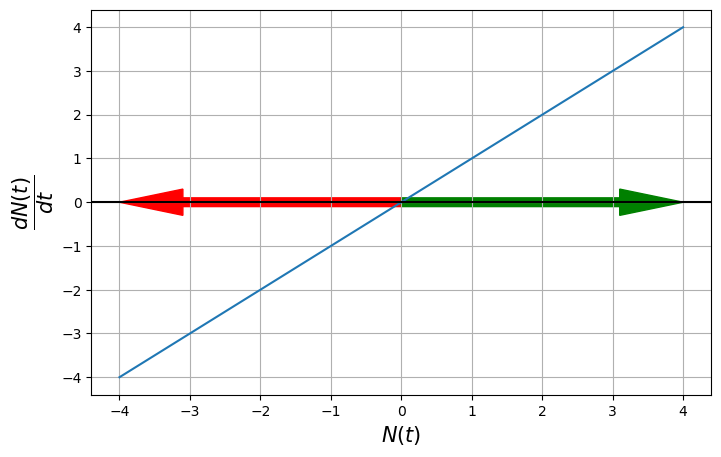

In [14]:
k = 1
N = np.linspace(-4, 4, 100)

plt.figure(figsize=(8,5), dpi=100)
plt.plot(N, k * N)  # dN/dt = k*N
plt.arrow(0, 0, -4, 0, width=0.2, length_includes_head=True, color="Red")
plt.arrow(0, 0, 4, 0, width=0.2, length_includes_head=True, color="Green")
plt.axhline(0, color='black')
plt.xlabel("$N(t)$", fontsize=15)
plt.ylabel(r'$\dfrac{dN(t)}{dt}$', fontsize=15)
plt.grid()

### Direction Fields (also called Slope Fields) of bacterial growth

We can get a general idea of the behaviour of ODE or system of ODEs by drawing a so called Direction Field or Slope Field.  
First, let's review that a differential $\frac{dy(t)}{dt}$ at a point $(t, y(t))$ in ODE $\frac{dy(t)}{dt}=f(t,y(t))$ is line tangent with slope $f(t,y(t))$.  
Let's plot this tangent for our example equation $\frac{dN(t)}{dt}=kN(t)$:

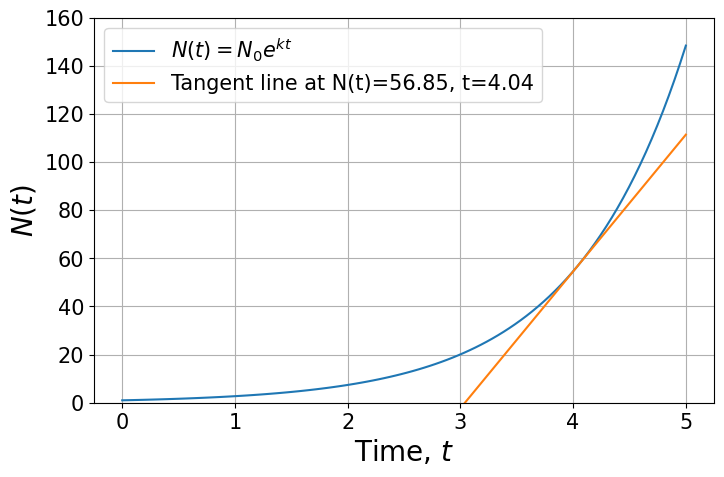

In [15]:
time = np.linspace(0, 5, 100)
OD600 = np.exp(time)
i=80
a=OD600[i]
b=(1-time[i])*OD600[i]

plt.figure(figsize=(8,5),dpi=100)
plt.plot(time, OD600, label="$N(t)=N_0e^{kt}$")
plt.plot(time,a*(time)+b, label=f"Tangent line at N(t)={OD600[i]:.2f}, t={time[i]:.2f}")
plt.ylim(0,160)
plt.xlabel("Time, $t$", fontsize=20)
plt.ylabel("$N(t)$", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.legend(fontsize=15);

The simple idea behind drawing Slope or Direction Fields is that we can calculate slope of the tangent at any point on the graph since it is simply equal to $f(t, y(t))$ in ODE $\frac{dy(t)}{dt}=f(t,y(t))$ or $kN(t)$ in ODE $\frac{dN(t)}{dt}=kN(t)$.  
So we can draw Direction Fields without solving the ODE.

Let's do it for a range of $N(t)$ and $t$ values for $\frac{dN(t)}{dt}=kN(t)$  

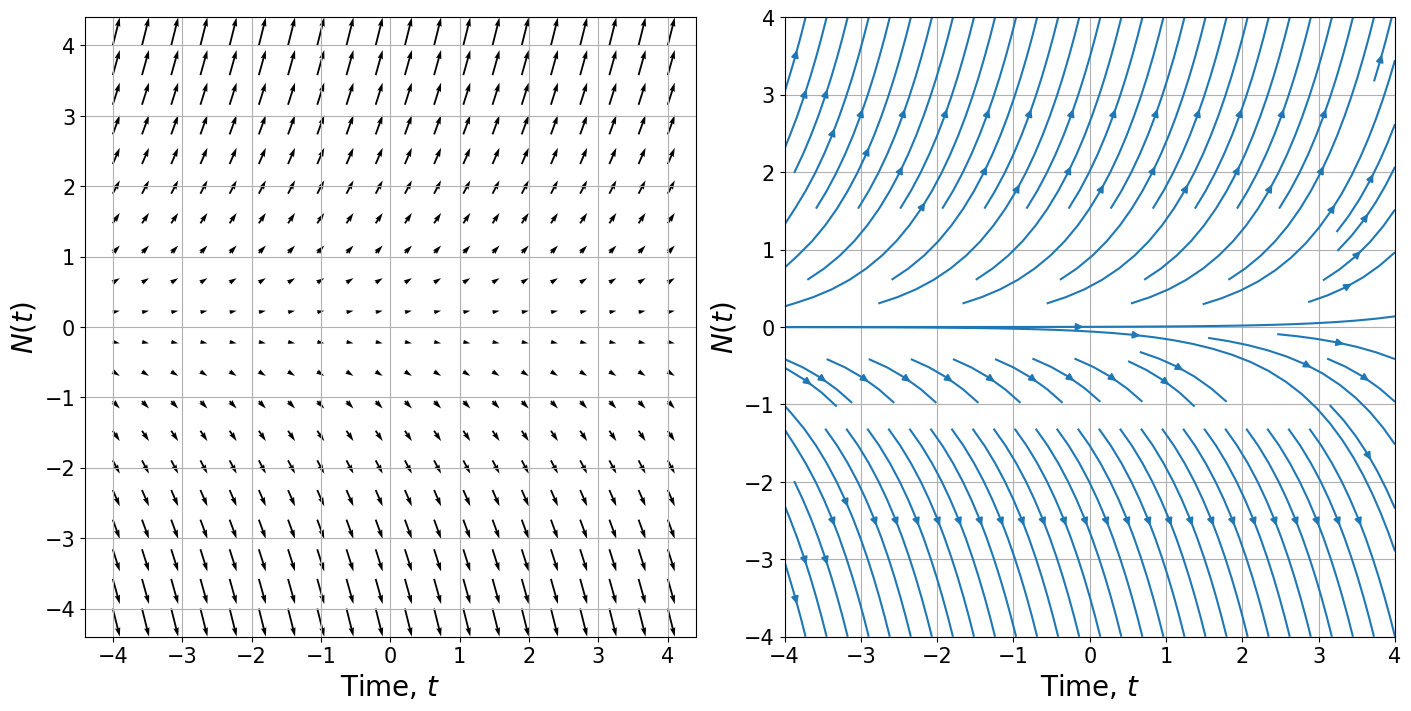

In [16]:
k = 1
N, t = np.mgrid[-4:4:20j,-4:4:20j]

slope = dNdt = k*N
magnitude = np.sqrt(1 + slope**2)  # Length of the vector (1, slope)
dt, dN = 1/magnitude, slope/magnitude  # Normalized components

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,7), dpi=100, constrained_layout=True)
axs[0].quiver(t, N, 1, slope)
axs[1].streamplot(t, N, dt, dN)

for ax in axs:
    ax.tick_params(labelsize=15)
    ax.grid(which='major', axis='both')
    ax.set_xlabel("Time, $t$",fontsize=20)
    ax.set_ylabel("$N(t)$",fontsize=20)

## Ligand binding to a receptor
Ligand *L* binding to receptor *R* to form a complex *LR* can be described by this equation:  
$\frac{d[LR]}{dt}=k_{on}[L][R]-k_{off}[LR]$  
$[R]_{total}=[R]+[LR]$  
$[L]_{total}=[L]+[LR]$  
where $k_{on}$ is the rate of binding of ligand to receptor and $k_{off}$ is the rate of unbinding of ligand from receptor.  
For simplicity we will assume that $[L]_{total}>>[R]_{total}$ so we can treat $[L]=[L]_{total}$ as constant so the equiation transforms to:  
$\frac{d[LR]}{dt}=k_{on}[L]_{total}([R]_{total}-[LR])-k_{off}[LR]$

### Phase portrait of ligand binding to receptor

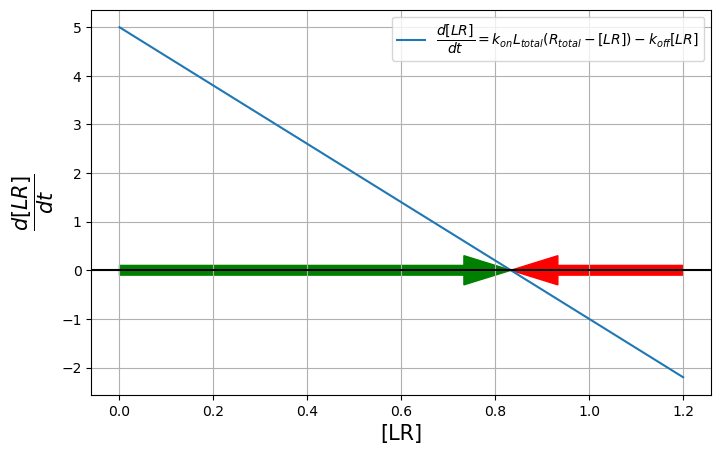

In [17]:
# Define parameters
k_on = 0.5  # binding rate constant
k_off = 1.0  # unbinding rate constant
L_total = 10.0  # total ligand concentration (assumed constant)
R_total = 1.0  # total receptor concentration

# Create range of LR values
LR = np.linspace(0, R_total*1.2, 100)  # Allow slightly beyond R_total for visualization

# Calculate d[LR]/dt
dLR_dt = k_on * L_total * (R_total - LR) - k_off * LR

# Find equilibrium point (where d[LR]/dt = 0)
LR_eq = (k_on * L_total * R_total) / (k_on * L_total + k_off)

plt.figure(figsize=(8,5), dpi=100)
plt.plot(LR, dLR_dt, label=r'$\dfrac{d[LR]}{dt}=k_{on}L_{total}(R_{total}-[LR]) - k_{off}[LR]$')
plt.arrow(0,0, LR_eq,0, width = 0.2, head_length = 0.1, length_includes_head = True, color= "Green")
plt.arrow(1.2,0, LR_eq-1.2,0, width = 0.2, head_length = 0.1, length_includes_head = True, color= "Red")
plt.axhline(0, color='black')
plt.xlabel("[LR]", fontsize=15)
plt.ylabel(r'$\dfrac{d[LR]}{dt}$', fontsize=15)
plt.grid()
plt.legend();

### *quiver()* and *streamplot()* for receptor binding

In [ ]:
# Direction field visualization using quiver and streamplot
LR, t = np.mgrid[0:R_total*1.2:20j, 0:10:20j]

# Calculate the slope at each point
slope = k_on * L_total * (R_total - LR) - k_off * LR
magnitude = np.sqrt(1 + slope**2)  # Length of the vector (1, slope)
dt, dLR = 1/magnitude, slope/magnitude  # Normalized components

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,7), dpi=100, constrained_layout=True)

# Quiver and streamplot
axs[0].quiver(t, LR, 1.2/10, slope)
axs[1].streamplot(t, LR, dt, dLR)

for ax in axs:
    ax.tick_params(labelsize=15)
    ax.grid(which='major', axis='both')
    ax.set_xlabel("Time, $t$", fontsize=20)
    ax.set_ylabel("$[LR](t)$", fontsize=20)

### Analytical solution of ligand binding to receptor

In [ ]:
# Analytical solution for ligand-receptor binding
LR = sym.symbols("LR", cls=sym.Function)
t, k_on, k_off, L_total, R_total, LR0 = sym.symbols("t, k_on, k_off, L_total, R_total, LR0")

# Set up and solve the differential equation
# d[LR]/dt = k_on*L_total*(R_total - LR(t)) - k_off*LR(t)
binding_ode = sym.diff(LR(t), t) - (k_on * L_total * (R_total - LR(t)) - k_off * LR(t))
binding_solution = sym.dsolve(binding_ode, LR(t), ics={LR(0): LR0})
binding_solution

In [ ]:
# Plot solutions for different initial conditions
sym.plot(
    binding_solution.rhs.subs({LR0: 0, k_on: 0.5, k_off: 1.0, L_total: 10, R_total: 1.0}),
    binding_solution.rhs.subs({LR0: 0.5, k_on: 0.5, k_off: 1.0, L_total: 10, R_total: 1.0}),
    binding_solution.rhs.subs({LR0: 1.0, k_on: 0.5, k_off: 1.0, L_total: 10, R_total: 1.0}),
    (t, 0, 1),
    xlabel="t",
    ylabel="[LR](t)",
    axis_center=(0,0),
    ylim=(0, 1.2),
);

### Fixed points of ligand binding to receptor

In [ ]:
LR, k_on, k_off, L_total, R_total = sym.symbols("LR, k_on, k_off, L_total, R_total")
solution = sym.nonlinsolve([-(k_on * L_total * (R_total - LR) - k_off * LR)], [LR])
solution

## Logistic growth

Logistic growth is used to describe the growth of population under conditions that can support max population of size $N_{max}$. This is the differential expression describing such a system:
  
  $\frac{dN(t)}{dt}=k \cdot N(t) \cdot (1-\frac{N(t)}{N_{max}})$  


### Phase portrait of logistic growth

We can also plot $N(t)$ on the x-axis and $\frac{dN(t)}{dt}=k \cdot N(t) \cdot (1-\frac{N(t)}{N_{max}})$ on the y-axis and get a static representation of how this differential equation will behave starting from any value of $N(t)$. This method is called phase portrait and is a popular way to see how one differential equations behaves (like we see below) or a system of two differential equations will behave as we will see in later lectures where we will plot one derivative on x-axis and another derivative on the y-axis.

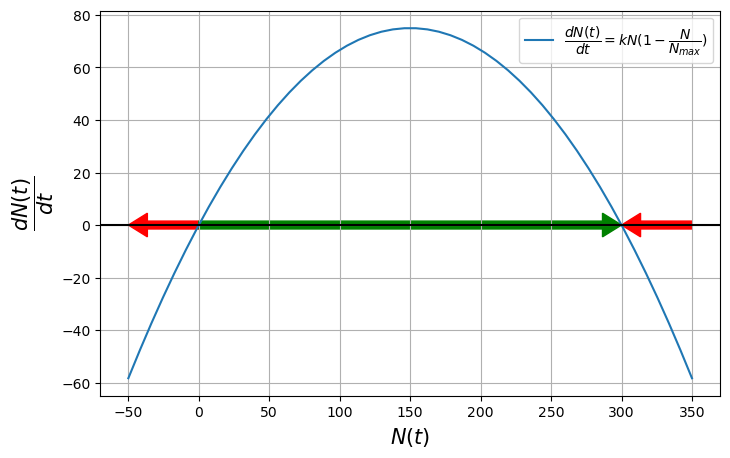

In [18]:
k = 1
N_max = 300
N=np.linspace(-50, 350)

plt.figure(figsize=(8,5), dpi=100)
plt.plot(N, k * N * (1-N/N_max), label=r'$\dfrac{dN(t)}{dt}=kN(1-\dfrac{N}{N_{max}})$')
plt.arrow(0,0,-50,0, width = 3, length_includes_head = True, color="Red")
plt.arrow(0,0,N_max,0, width = 3, length_includes_head = True, color= "Green")
plt.arrow(N_max+50,0,-50,0, width = 3, length_includes_head = True, color="Red")
plt.axhline(0, color='black')
plt.xlabel("$N(t)$", fontsize=15)
plt.ylabel(r'$\dfrac{dN(t)}{dt}$', fontsize=15)
plt.grid()
plt.legend();

From this phase portrait we can visually see which fixed points is *stable* (i.e., a small change in $N(t)$ near $N=N_{max}$ will bring $N(t)$ *back* to $N_{max}$) and which fixed points is *unstable* (i.e., a small change in $N(t)$ near $N=0$ will bring $N(t)$ *away* to fixed point)

### Now lets use *quiver()* and *streamplot()* on Logistic Growth:

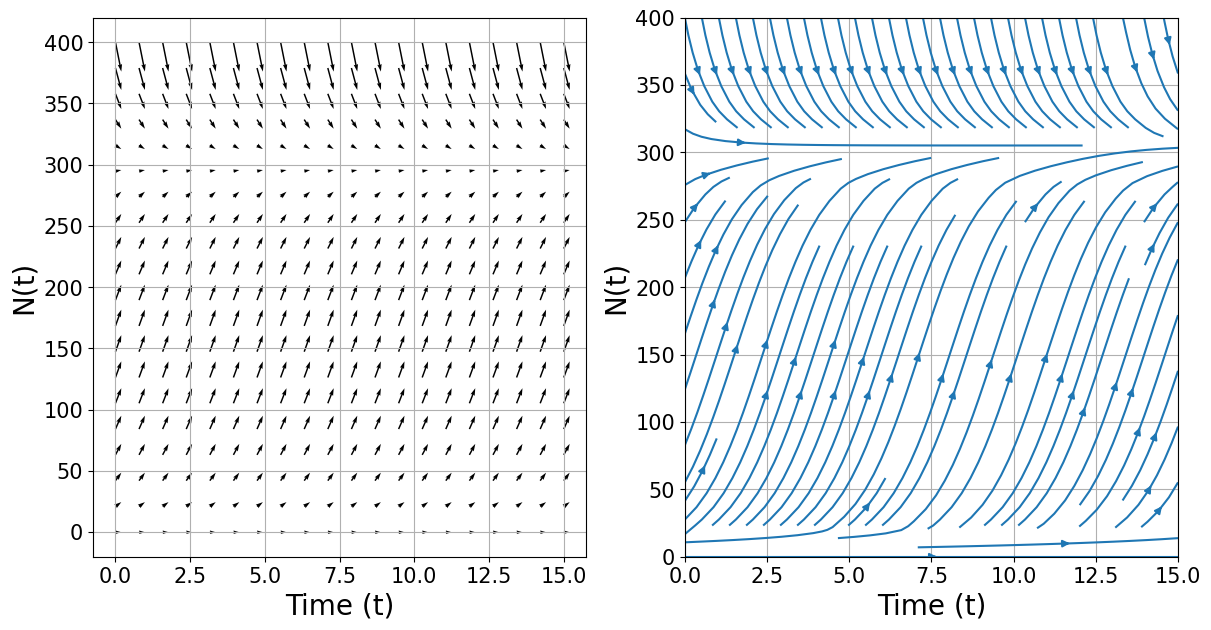

In [19]:
p, t = np.mgrid[0:400:20j,0:15:20j]
slope = 1 * p * (1 - p/300)
magnitude = np.sqrt(1 + slope**2)  # Length of the vector (1, slope)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,7), dpi=100)
axs[0].quiver(t, p, 400/15, slope)
axs[1].streamplot(t, p, 1/magnitude, slope/magnitude)

for ax in axs:
    ax.tick_params(labelsize=15)
    ax.grid(which='major', axis='both')
    ax.set_xlabel("Time (t)",fontsize=20)
    ax.set_ylabel("N(t)",fontsize=20)

### Let's solve logistic growth equation with sove_ivp()

In [ ]:
k = 1
N_0 = [1]
tspan = [0, 15]
N_max = 300
def fun(t, N):
    dN_dt = k * N * (1-N/N_max)
    return dN_dt

soln = solve_ivp(fun, tspan, N_0, t_eval=np.linspace(0, 15, 1000))

plt.figure(figsize=(8,5), dpi=100)
plt.plot(soln.t, soln.y[0])
plt.xlabel("Time, $t$", fontsize=15)
plt.ylabel("$N(t)$", fontsize=15)
plt.grid()

### Analytical solution of logistic growth equation

In [ ]:
N = sym.symbols("N", cls=sym.Function)
t, k, N0, N_max = sym.symbols("t, k, N0, N_max")
Logistic_growth_solution = sym.dsolve(sym.diff(N(t), t) - k * N(t) * (1 - N(t) / N_max), 
                                      N(t), 
                                      ics={N(0): N0})
Logistic_growth_solution.simplify()

In [ ]:
sym.plot(
    Logistic_growth_solution.rhs.subs({N0: 3, N_max: 100, k: sym.ln(2)}),
    Logistic_growth_solution.rhs.subs({N0: 30, N_max: 100, k: sym.ln(2)}),
    Logistic_growth_solution.rhs.subs({N0: 130, N_max: 100, k: sym.ln(2)}),
    (t, 0, 15),
    xlabel="t",
    ylabel="N(t)",
    axis_center=(0,0),
    ylim=(0,150),
);

The main idea behind stable points is to find $N$ where $\frac{dN(t)}{dt}=0$.  
To do this we need to solve the equation $\frac{dN(t)}{dt}=kN(t) \cdot (1-\frac{N(t)}{N_{max}})=0$  


In [ ]:
N, k, N_max = sym.symbols("N, k, N_max")
sym.nonlinsolve([- k * N * (1 - N / N_max)], [N])